<a href="https://colab.research.google.com/github/adeedaiyman/Chicago-Traffic-Crash-Analysis-Using-SQL/blob/main/Voice_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os

base_dir = "tts_data"
models = ["google", "coqui", "bark", "elevenlabs"]

for m in models:
    os.makedirs(f"{base_dir}/{m}", exist_ok=True)

print("Folder structure created!")


Folder structure created!


In [5]:
sentences = [
    "The stock market closed higher today.",
    "Please proceed to gate number seven.",
    "Wow, that was absolutely incredible!",
    "Your total payable amount is five hundred rupees.",
    # "Scientists discovered a new exoplanet in the Milky Way.",
    # "Could you please send me the documents by Monday?",
    # "Flight AI three zero two departs at eleven forty five A M.",
    # "Thank you for using our service. Have a great day!"
]

len(sentences)


4

In [6]:
!pip install gTTS pydub
from gtts import gTTS
from pydub import AudioSegment

for i, text in enumerate(sentences):
    tts = gTTS(text=text, lang='en')
    file_path = f"{base_dir}/google/sentence_{i}.mp3"
    tts.save(file_path)

print("Google TTS generation done.")


Google TTS generation done.


In [7]:
os.listdir(f"{base_dir}/google")


['sentence_3.mp3', 'sentence_2.mp3', 'sentence_0.mp3', 'sentence_1.mp3']

In [8]:
for file in os.listdir(f"{base_dir}/google"):
    if file.endswith(".mp3"):
        mp3_path = f"{base_dir}/google/{file}"
        wav_path = mp3_path.replace(".mp3", ".wav")
        AudioSegment.from_mp3(mp3_path).export(wav_path, format="wav")


In [10]:
!pip install bark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 20.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.5 MB/s eta 0:00:00
  Created wheel for encodec: filename=encodec-0.1.1-py3-none-any.whl size=45759 sha256=2368704a05d09cb4ab3da5a37eb672a35da0ec174a25e58def7819d9887737f8
  Stored in directory: /root/.cache/pip/wheels/b8/eb/9f/e13610cc46ab39d3199fbabebd1c3e142d44b679526e0f228a
Successfully built encodec


In [12]:
!pip install transformers datasets soundfile accelerate


In [13]:
from transformers import AutoProcessor, BarkModel
import soundfile as sf
import torch

processor = AutoProcessor.from_pretrained("suno/bark")
model = BarkModel.from_pretrained("suno/bark")

for i, text in enumerate(sentences):
    inputs = processor(text, return_tensors="pt")
    audio_array = model.generate(**inputs)
    wav = audio_array.cpu().numpy().squeeze()
    sf.write(f"{base_dir}/bark/sentence_{i}.wav", wav, 22050)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/353 [00:00<?, ?B/s]

speaker_embeddings_path.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/4.49G [00:00<?, ?B/s]

generation_config.json: 0.00B [00:00, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.
The attention mask

In [14]:
import os
os.listdir(f"{base_dir}/bark")


['sentence_3.wav', 'sentence_0.wav', 'sentence_1.wav', 'sentence_2.wav']

In [18]:
!pip install --upgrade elevenlabs


In [16]:
api_key = "3b125a42c22406bda918c617238fffebf6bc88454509f95eb8f193930c988dee"


In [19]:
from elevenlabs.client import ElevenLabs
from elevenlabs import save

client = ElevenLabs(api_key=api_key)

for i, text in enumerate(sentences):
    audio = client.text_to_speech.convert(
        voice_id="pNInz6obpgDQGcFmaJgB", # Rachel voice
        text=text,
        model_id="eleven_multilingual_v2"
    )
    save(audio, f"{base_dir}/elevenlabs/sentence_{i}.mp3")


In [20]:
from pydub import AudioSegment
import os

for file in os.listdir(f"{base_dir}/elevenlabs"):
    if file.endswith(".mp3"):
        mp3_path = f"{base_dir}/elevenlabs/{file}"
        wav_path = mp3_path.replace(".mp3", ".wav")
        AudioSegment.from_mp3(mp3_path).export(wav_path, format="wav")


In [21]:
os.listdir(f"{base_dir}/elevenlabs")


['sentence_3.mp3',
 'sentence_3.wav',
 'sentence_0.wav',
 'sentence_2.mp3',
 'sentence_0.mp3',
 'sentence_1.mp3',
 'sentence_1.wav',
 'sentence_2.wav']

In [22]:
!pip install librosa soundfile numpy pandas


In [23]:
import librosa
import numpy as np
import pandas as pd
import os

data = []

models = ["google", "bark", "elevenlabs"]

for model in models:
    folder = f"{base_dir}/{model}"
    for file in os.listdir(folder):
        if file.endswith(".wav"):
            file_path = f"{folder}/{file}"
            y, sr = librosa.load(file_path, sr=None)

            # Duration
            duration = librosa.get_duration(y=y, sr=sr)

            # Pitch estimation
            pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
            pitch_vals = pitches[magnitudes > np.median(magnitudes)]
            pitch_mean = pitch_vals.mean() if len(pitch_vals) > 0 else 0
            pitch_std = pitch_vals.std() if len(pitch_vals) > 0 else 0

            data.append({
                "sentence": file.replace(".wav",""),
                "model": model,
                "duration": duration,
                "pitch_mean": pitch_mean,
                "pitch_std": pitch_std
            })

df = pd.DataFrame(data)
df.head()


,sentence,model,duration,pitch_mean,pitch_std
0,sentence_3,google,3.720000,1297.437500,1006.655273
1,sentence_0,google,2.808000,1340.583496,1037.821655
2,sentence_1,google,2.640000,1102.823975,1088.254395
3,sentence_2,google,3.192000,1001.864685,679.206177
4,sentence_3,bark,2.887982,1382.412842,1025.571655


In [24]:
def count_words(s):
    return len(s.split())

df["words"] = df["sentence"].apply(lambda s: count_words(sentences[int(s.split("_")[1])]))
df["speaking_rate"] = df["words"] / df["duration"]
df.head()


,sentence,model,duration,pitch_mean,pitch_std,words,speaking_rate
0,sentence_3,google,3.720000,1297.437500,1006.655273,8,2.150538
1,sentence_0,google,2.808000,1340.583496,1037.821655,6,2.136752
2,sentence_1,google,2.640000,1102.823975,1088.254395,6,2.272727
3,sentence_2,google,3.192000,1001.864685,679.206177,5,1.566416
4,sentence_3,bark,2.887982,1382.412842,1025.571655,8,2.770101


In [25]:
# Compute MFCCs for all audio
mfccs = {}

for model in models:
    mfccs[model] = {}
    folder = f"{base_dir}/{model}"
    for file in os.listdir(folder):
        if file.endswith(".wav"):
            y, sr = librosa.load(f"{folder}/{file}", sr=None)
            mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
            mfccs[model][file] = mfcc.mean(axis=1)


In [26]:
from numpy.linalg import norm

distances = []

for file in mfccs["google"]:
    base = mfccs["google"][file]
    for model in models:
        vec = mfccs[model][file]
        d = norm(base - vec)
        distances.append({
            "sentence": file.replace(".wav",""),
            "model": model,
            "mfcc_distance_google": d
        })

df2 = pd.DataFrame(distances)
df2.head()


,sentence,model,mfcc_distance_google
0,sentence_3,google,0.000000
1,sentence_3,bark,122.631592
2,sentence_3,elevenlabs,76.075256
3,sentence_0,google,0.000000
4,sentence_0,bark,69.621849


In [27]:
df = df.merge(df2, on=["sentence","model"])
df.head()


,sentence,model,duration,pitch_mean,pitch_std,words,speaking_rate,mfcc_distance_google
0,sentence_3,google,3.720000,1297.437500,1006.655273,8,2.150538,0.000000
1,sentence_0,google,2.808000,1340.583496,1037.821655,6,2.136752,0.000000
2,sentence_1,google,2.640000,1102.823975,1088.254395,6,2.272727,0.000000
3,sentence_2,google,3.192000,1001.864685,679.206177,5,1.566416,0.000000
4,sentence_3,bark,2.887982,1382.412842,1025.571655,8,2.770101,122.631592


In [28]:
df.to_csv("tts_metrics.csv", index=False)


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns


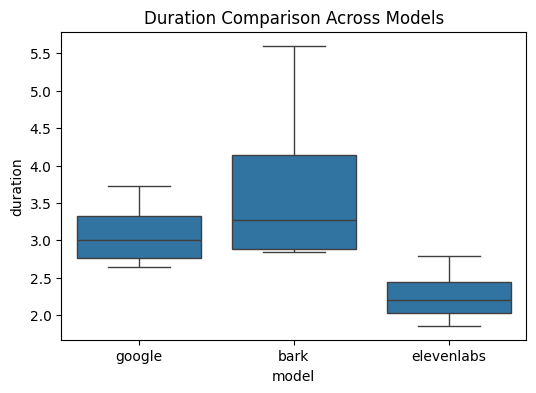

In [30]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="model", y="duration")
plt.title("Duration Comparison Across Models")
plt.show()


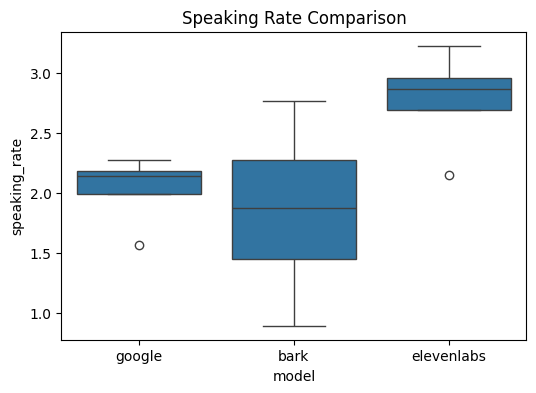

In [31]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="model", y="speaking_rate")
plt.title("Speaking Rate Comparison")
plt.show()


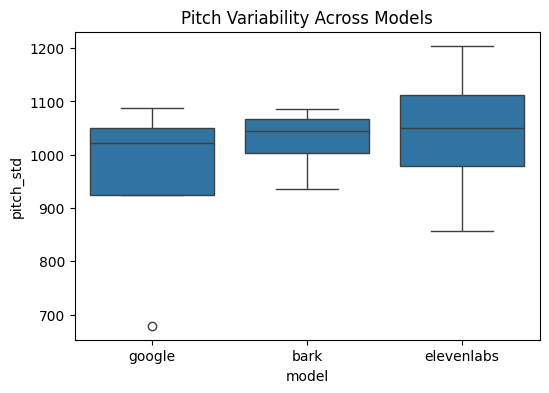

In [32]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="model", y="pitch_std")
plt.title("Pitch Variability Across Models")
plt.show()


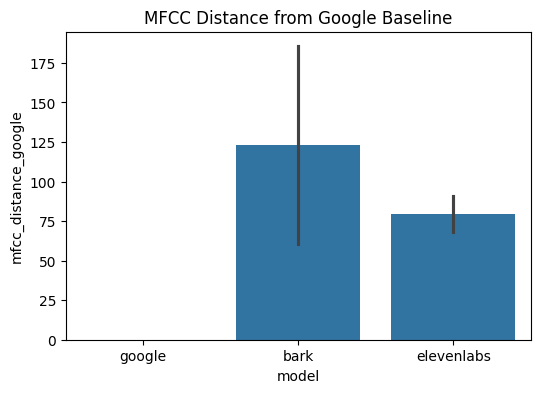

In [33]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x="model", y="mfcc_distance_google", estimator="mean", errorbar="sd")
plt.title("MFCC Distance from Google Baseline")
plt.show()


In [34]:
summary = df.groupby("model").agg({
    "duration":"mean",
    "speaking_rate":"mean",
    "pitch_std":"mean",
    "mfcc_distance_google":"mean"
}).reset_index()

summary


,model,duration,speaking_rate,pitch_std,mfcc_distance_google
0,bark,3.747846,1.853167,1027.117798,123.030464
1,elevenlabs,2.263946,2.781372,1040.536865,79.559143
2,google,3.090000,2.031608,952.984375,0.000000


In [35]:
import os
os.makedirs("plots", exist_ok=True)


In [36]:
plt.savefig("plots/duration_comparison.png", dpi=200)
plt.savefig("plots/speaking_rate.png", dpi=200)
plt.savefig("plots/pitch_variability.png", dpi=200)
plt.savefig("plots/mfcc_distance.png", dpi=200)



<Figure size 640x480 with 0 Axes>

In [37]:
from IPython.display import Audio, display

for model in models:
    print(f"\n=== MODEL: {model} ===")
    for i, text in enumerate(sentences):
        print(f"Sentence {i}: \"{text}\"")
        display(Audio(f"{base_dir}/{model}/sentence_{i}.wav"))



=== MODEL: google ===
Sentence 0: "The stock market closed higher today."


Sentence 1: "Please proceed to gate number seven."


Sentence 2: "Wow, that was absolutely incredible!"


Sentence 3: "Your total payable amount is five hundred rupees."



=== MODEL: bark ===
Sentence 0: "The stock market closed higher today."


Sentence 1: "Please proceed to gate number seven."


Sentence 2: "Wow, that was absolutely incredible!"


Sentence 3: "Your total payable amount is five hundred rupees."



=== MODEL: elevenlabs ===
Sentence 0: "The stock market closed higher today."


Sentence 1: "Please proceed to gate number seven."


Sentence 2: "Wow, that was absolutely incredible!"


Sentence 3: "Your total payable amount is five hundred rupees."


In [38]:
ratings = []

for model in models:
    print(f"\n=== Enter Ratings for {model} ===")
    for i, text in enumerate(sentences):
        print(f"Sentence {i}: \"{text}\"")

        clarity = float(input("Clarity (1-5): "))
        naturalness = float(input("Naturalness (1-5): "))
        expressiveness = float(input("Expressiveness (1-5): "))

        ratings.append({
            "sentence": f"sentence_{i}",
            "model": model,
            "clarity": clarity,
            "naturalness": naturalness,
            "expressiveness": expressiveness
        })

mos_df = pd.DataFrame(ratings)
mos_df



=== Enter Ratings for google ===
Sentence 0: "The stock market closed higher today."
Clarity (1-5): 3
Naturalness (1-5): 2
Expressiveness (1-5): 1
Sentence 1: "Please proceed to gate number seven."
Clarity (1-5): 2
Naturalness (1-5): 2
Expressiveness (1-5): 2
Sentence 2: "Wow, that was absolutely incredible!"
Clarity (1-5): 3
Naturalness (1-5): 2
Expressiveness (1-5): 1
Sentence 3: "Your total payable amount is five hundred rupees."
Clarity (1-5): 3
Naturalness (1-5): 2
Expressiveness (1-5): 1

=== Enter Ratings for bark ===
Sentence 0: "The stock market closed higher today."
Clarity (1-5): 2
Naturalness (1-5): 2
Expressiveness (1-5): 2
Sentence 1: "Please proceed to gate number seven."
Clarity (1-5): 2
Naturalness (1-5): 2
Expressiveness (1-5): 2
Sentence 2: "Wow, that was absolutely incredible!"
Clarity (1-5): 2
Naturalness (1-5): 2
Expressiveness (1-5): 2
Sentence 3: "Your total payable amount is five hundred rupees."
Clarity (1-5): 2
Naturalness (1-5): 2
Expressiveness (1-5): 2

=

,sentence,model,clarity,naturalness,expressiveness
0,sentence_0,google,3.0,2.0,1.0
1,sentence_1,google,2.0,2.0,2.0
2,sentence_2,google,3.0,2.0,1.0
3,sentence_3,google,3.0,2.0,1.0
4,sentence_0,bark,2.0,2.0,2.0
5,sentence_1,bark,2.0,2.0,2.0
6,sentence_2,bark,2.0,2.0,2.0
7,sentence_3,bark,2.0,2.0,2.0
8,sentence_0,elevenlabs,4.0,4.0,5.0
9,sentence_1,elevenlabs,4.0,4.0,5.0


In [39]:
full = df.merge(mos_df, on=["sentence","model"])
full.head()


,sentence,model,duration,pitch_mean,pitch_std,words,speaking_rate,mfcc_distance_google,clarity,naturalness,expressiveness
0,sentence_3,google,3.720000,1297.437500,1006.655273,8,2.150538,0.000000,3.0,2.0,1.0
1,sentence_0,google,2.808000,1340.583496,1037.821655,6,2.136752,0.000000,3.0,2.0,1.0
2,sentence_1,google,2.640000,1102.823975,1088.254395,6,2.272727,0.000000,2.0,2.0,2.0
3,sentence_2,google,3.192000,1001.864685,679.206177,5,1.566416,0.000000,3.0,2.0,1.0
4,sentence_3,bark,2.887982,1382.412842,1025.571655,8,2.770101,122.631592,2.0,2.0,2.0


In [40]:
corr = full[[
    "duration",
    "pitch_std",
    "speaking_rate",
    "mfcc_distance_google",
    "clarity",
    "naturalness",
    "expressiveness"
]].corr()

corr


,duration,pitch_std,speaking_rate,mfcc_distance_google,clarity,naturalness,expressiveness
duration,1.000000,0.000051,-0.833923,0.448882,-0.570424,-0.579717,-0.533561
pitch_std,0.000051,1.000000,0.377139,0.282914,-0.020900,0.185760,0.278070
speaking_rate,-0.833923,0.377139,1.000000,-0.202579,0.564104,0.630178,0.609435
mfcc_distance_google,0.448882,0.282914,-0.202579,1.000000,-0.171333,0.141741,0.293882
clarity,-0.570424,-0.020900,0.564104,-0.171333,1.000000,0.888662,0.751872
naturalness,-0.579717,0.185760,0.630178,0.141741,0.888662,1.000000,0.970495
expressiveness,-0.533561,0.278070,0.609435,0.293882,0.751872,0.970495,1.000000


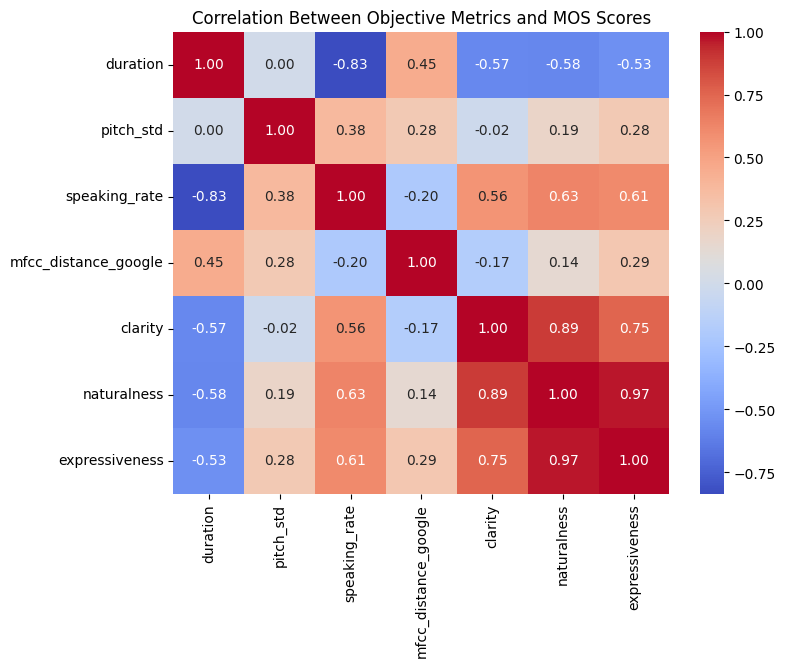

In [41]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Objective Metrics and MOS Scores")
plt.show()


In [42]:
mos_summary = full.groupby("model")[["clarity","naturalness","expressiveness"]].mean()
mos_summary


,clarity,naturalness,expressiveness
model,,,
bark,2.00,2.0,2.00
elevenlabs,4.00,4.0,5.00
google,2.75,2.0,1.25


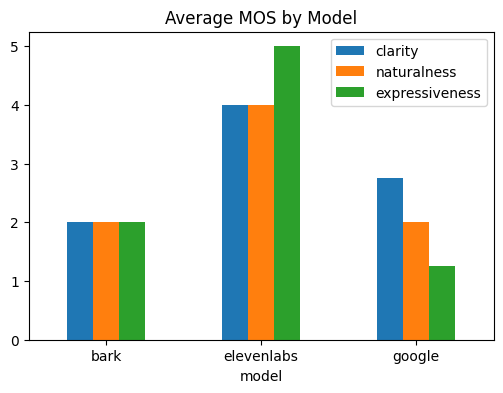

In [43]:
mos_summary.plot(kind="bar", figsize=(6,4), title="Average MOS by Model")
plt.xticks(rotation=0)
plt.show()


In [44]:
full.to_csv("tts_evaluation_full.csv", index=False)
mos_summary.to_csv("tts_mos_summary.csv")
corr.to_csv("tts_correlations.csv")
